In [1]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tensorflow

  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install keras==2.2.4


  Using cached Keras-2.2.4-py2.py3-none-any.whl.metadata (2.2 kB)
Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 2.2.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install opencv.python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install flask


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install prophet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
#importing libraries
from sklearn.metrics import mean_squared_error
import math
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [13]:

df = pd.read_csv('rice production across different countries from 1961 to 2021.csv')
df.head()

,Area,Year,Unit,Value,Flag,Flag Description
0,Afghanistan,1961,tonnes,319000.0,A,Official figure
1,Afghanistan,1962,tonnes,319000.0,A,Official figure
2,Afghanistan,1963,tonnes,319000.0,A,Official figure
3,Afghanistan,1964,tonnes,380000.0,A,Official figure
4,Afghanistan,1965,tonnes,380000.0,A,Official figure


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              7324 non-null   object 
 1   Year              7324 non-null   int64  
 2   Unit              7324 non-null   object 
 3   Value             7324 non-null   float64
 4   Flag              7324 non-null   object 
 5   Flag Description  7324 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 343.4+ KB


In [15]:
le=LabelEncoder()
df['Area']=le.fit_transform(df['Area'])
df['Flag Description']=le.fit_transform(df['Flag Description'])
df['Unit']=le.fit_transform(df['Unit'])
df['Flag']=le.fit_transform(df['Flag'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              7324 non-null   int64  
 1   Year              7324 non-null   int64  
 2   Unit              7324 non-null   int64  
 3   Value             7324 non-null   float64
 4   Flag              7324 non-null   int64  
 5   Flag Description  7324 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 343.4 KB


In [16]:
df.isnull().sum()

Area                0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [18]:
type(df['Year'][0])
dates= pd.to_datetime(df['Year'].astype(str))
dates

0      1961-01-01
1      1962-01-01
2      1963-01-01
3      1964-01-01
4      1965-01-01
          ...    
7319   2017-01-01
7320   2018-01-01
7321   2019-01-01
7322   2020-01-01
7323   2021-01-01
Name: Year, Length: 7324, dtype: datetime64[ns]

In [19]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
new=pd.DataFrame()
new['ds']=dates
new['y']=df['Value']
new

,ds,y
0,1961-01-01,319000.00
1,1962-01-01,319000.00
2,1963-01-01,319000.00
3,1964-01-01,380000.00
4,1965-01-01,380000.00
...,...,...
7319,2017-01-01,1326.90
7320,2018-01-01,1342.47
7321,2019-01-01,1134.00
7322,2020-01-01,750.00


In [21]:
#set year column as index
new.set_index('ds',inplace=True)
#resample to annual frequency
new=new.resample('A').mean()
new

,y
ds,
1961-12-31,2.494167e+06
1962-12-31,2.680106e+06
1963-12-31,2.968427e+06
1964-12-31,3.170752e+06
1965-12-31,3.134230e+06
...,...
2017-12-31,7.663097e+06
2018-12-31,6.771557e+06
2019-12-31,6.699247e+06


In [22]:
new ['ds'] = new.index
new

,y,ds
ds,,
1961-12-31,2.494167e+06,1961-12-31
1962-12-31,2.680106e+06,1962-12-31
1963-12-31,2.968427e+06,1963-12-31
1964-12-31,3.170752e+06,1964-12-31
1965-12-31,3.134230e+06,1965-12-31
...,...,...
2017-12-31,7.663097e+06,2017-12-31
2018-12-31,6.771557e+06,2018-12-31
2019-12-31,6.699247e+06,2019-12-31


In [23]:
df = df.fillna(0)


# Display the DataFrame after filling missing values
print("\nDataFrame after filling missing values with constant:")
print(df)


DataFrame after filling missing values with constant:
      Area  Year  Unit      Value  Flag  Flag Description
0        0  1961     0  319000.00     0                 3
1        0  1962     0  319000.00     0                 3
2        0  1963     0  319000.00     0                 3
3        0  1964     0  380000.00     0                 3
4        0  1965     0  380000.00     0                 3
...    ...   ...   ...        ...   ...               ...
7319   148  2017     0    1326.90     2                 1
7320   148  2018     0    1342.47     2                 1
7321   148  2019     0    1134.00     0                 3
7322   148  2020     0     750.00     1                 0
7323   148  2021     0    2908.00     0                 3

[7324 rows x 6 columns]


In [24]:
df.describe(include='all')

,Area,Year,Unit,Value,Flag,Flag Description
count,7324.000000,7324.000000,7324.0,7.324000e+03,7324.000000,7324.000000
mean,72.055844,1992.190470,0.0,5.593586e+06,0.328099,2.723785
std,43.631159,17.675328,0.0,2.439717e+07,0.882761,0.865550
min,0.000000,1961.000000,0.0,0.000000e+00,0.000000,0.000000
25%,32.000000,1977.000000,0.0,1.409250e+04,0.000000,3.000000
50%,70.000000,1993.000000,0.0,1.202430e+05,0.000000,3.000000
75%,109.000000,2008.000000,0.0,9.817132e+05,0.000000,3.000000
max,148.000000,2021.000000,0.0,2.144299e+08,4.000000,4.000000


In [25]:
for i in df.drop(columns=['Value']).columns:
    print('unique Values of' ,i ,':',len(list(df[i].unique())))

unique Values of Area : 149
unique Values of Year : 61
unique Values of Unit : 1
unique Values of Flag : 5
unique Values of Flag Description : 5


In [26]:
plt.figure(figsize=(10,5))
plt.hist(df['Year'],rwidth=0.7)

(array([657., 674., 678., 674., 681., 742., 756., 755., 753., 954.]),
 array([1961., 1967., 1973., 1979., 1985., 1991., 1997., 2003., 2009.,
        2015., 2021.]),
 <BarContainer object of 10 artists>)

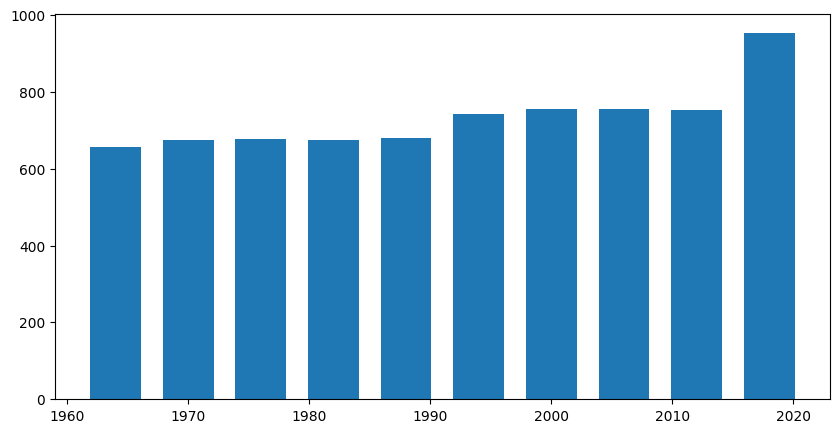

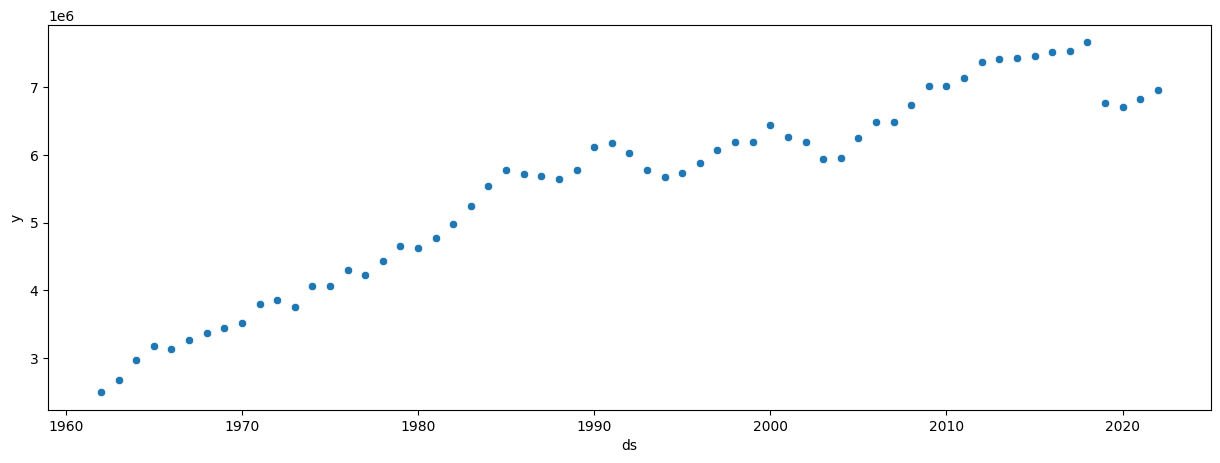

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='ds', y='y', data=new) # Pass 'ds' and 'y' as keyword arguments and provide the data source
plt.show()

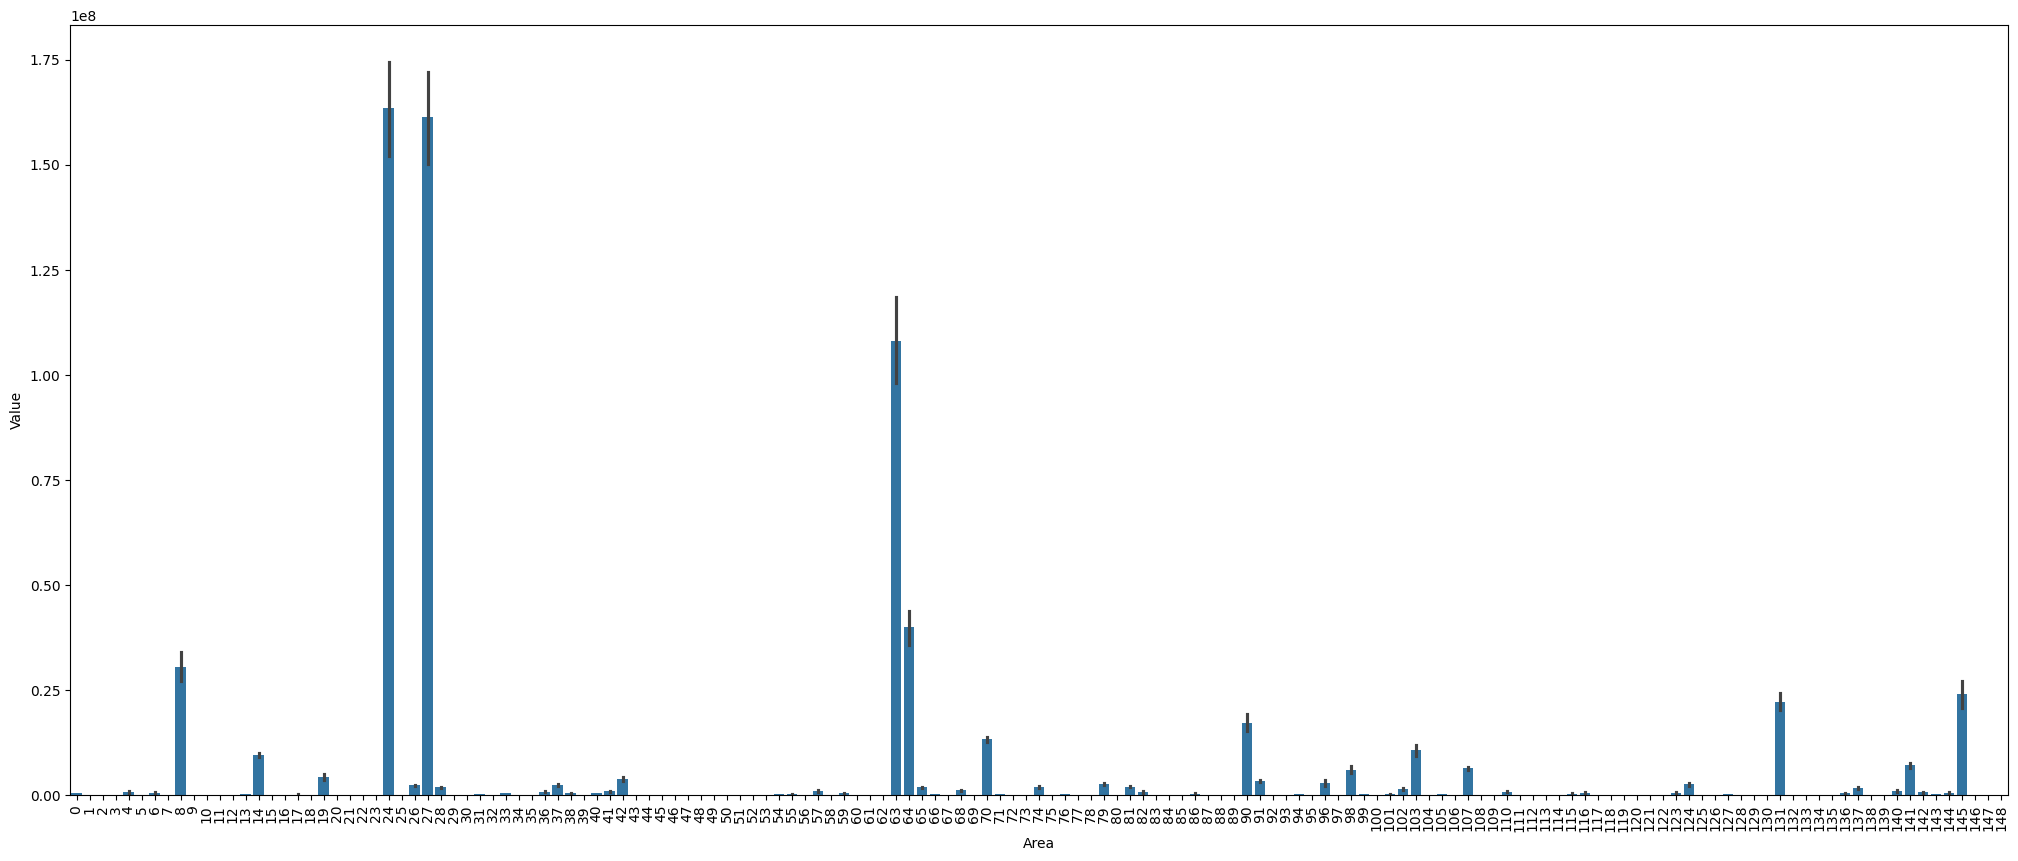

In [28]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x=df.Area, y=df.Value) # Pass 'x' and 'y' as keyword arguments
plt.show()

In [29]:
# Split data into training and testing sets
train_size = int(len(new) * 0.8)
train, test = new['y'].iloc[:train_size], new['y'].iloc[train_size:]
print (train.shape)
print(test.shape)

(48,)
(13,)


MAE: 7215059.739392
R2_Score: -523.1234227590546


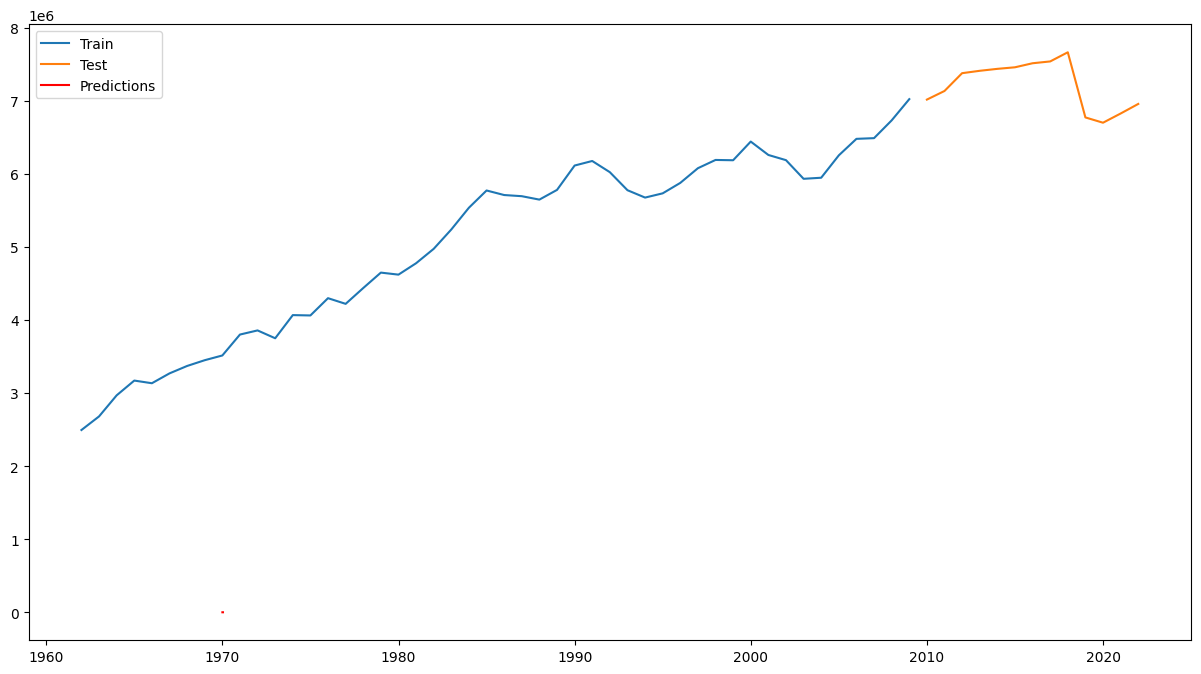

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have a model named 'your_model' and test data 'your_test_data'
# If not, replace them with your actual model and data.
# Example: predictions = your_model.predict(your_test_data)

# Replace this with your model prediction logic:
# For demonstration, I'm creating random predictions.
# Please ensure you have defined and trained your model correctly.
import numpy as np
predictions = np.random.rand(len(test)) * 10  # Replace with your actual prediction logic


# Assuming 'test', 'predictions', and 'train' are already defined
# Calculate MAE and R2 score
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)

print("MAE: %2f" % mae)
print("R2_Score:", r2)

# Plot predictions and actual values
plt.figure(figsize=(15, 8))
plt.plot(train, label='Train')  # Label for the training data
plt.plot(test, label='Test')   # Label for the actual test data
plt.plot(predictions, color='red', label='Predictions')  # Label for predictions
plt.legend()
plt.show()

In [31]:
# Define parameter grid for grid search
import itertools
p = range(0, 3) # Changed р to p
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
# Perform grid search
best_score, best_cfg, bestfit = float('inf'), None, None
for param in pdq:
    try: # Indent the 'try' block to be part of the 'for' loop
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        y_pred = model_fit.forecast(len(test))
        mae = np.sqrt(mean_absolute_error(test, y_pred))
        print(param, 'MAE:', mae)
        if mae < best_score:  # Changed rmse to mae for consistency
            best_score, best_cfg, bestfit = mae, param, model_fit
    except:
        continue
print('Best parameters: ', best_cfg)
print('mae: ', best_score)

(0, 0, 0) MAE: 1470.7437683209869
(0, 0, 1) MAE: 1449.149787698572
(0, 0, 2) MAE: 1421.740809823649
(0, 1, 0) MAE: 568.0192673267467
(0, 1, 1) MAE: 561.7140241109017
(0, 1, 2) MAE: 546.4710852767995
(0, 2, 0) MAE: 1357.7357304259974
(0, 2, 1) MAE: 1320.5739096142129
(0, 2, 2) MAE: 1179.4161549705568
(1, 0, 0) MAE: 569.9200754175704
(1, 0, 1) MAE: 552.8654412398556
(1, 0, 2) MAE: 525.8037602469777
(1, 1, 0) MAE: 557.7877540224487
(1, 1, 1) MAE: 574.8439933545515
(1, 1, 2) MAE: 580.9595157510356
(1, 2, 0) MAE: 1343.4026375140647
(1, 2, 1) MAE: 959.7742855705266
(1, 2, 2) MAE: 983.2806673519107
(2, 0, 0) MAE: 520.2157176546973
(2, 0, 1) MAE: 497.91958882512426
(2, 0, 2) MAE: 517.8839875108064
(2, 1, 0) MAE: 540.8312247546676
(2, 1, 1) MAE: 583.7690948172043
(2, 1, 2) MAE: 575.7119915580938
(2, 2, 0) MAE: 1302.7515289607784
(2, 2, 1) MAE: 983.9152256471518
(2, 2, 2) MAE: 965.18717777692
Best parameters:  (2, 0, 1)
mae:  497.91958882512426


mae: 247923.92


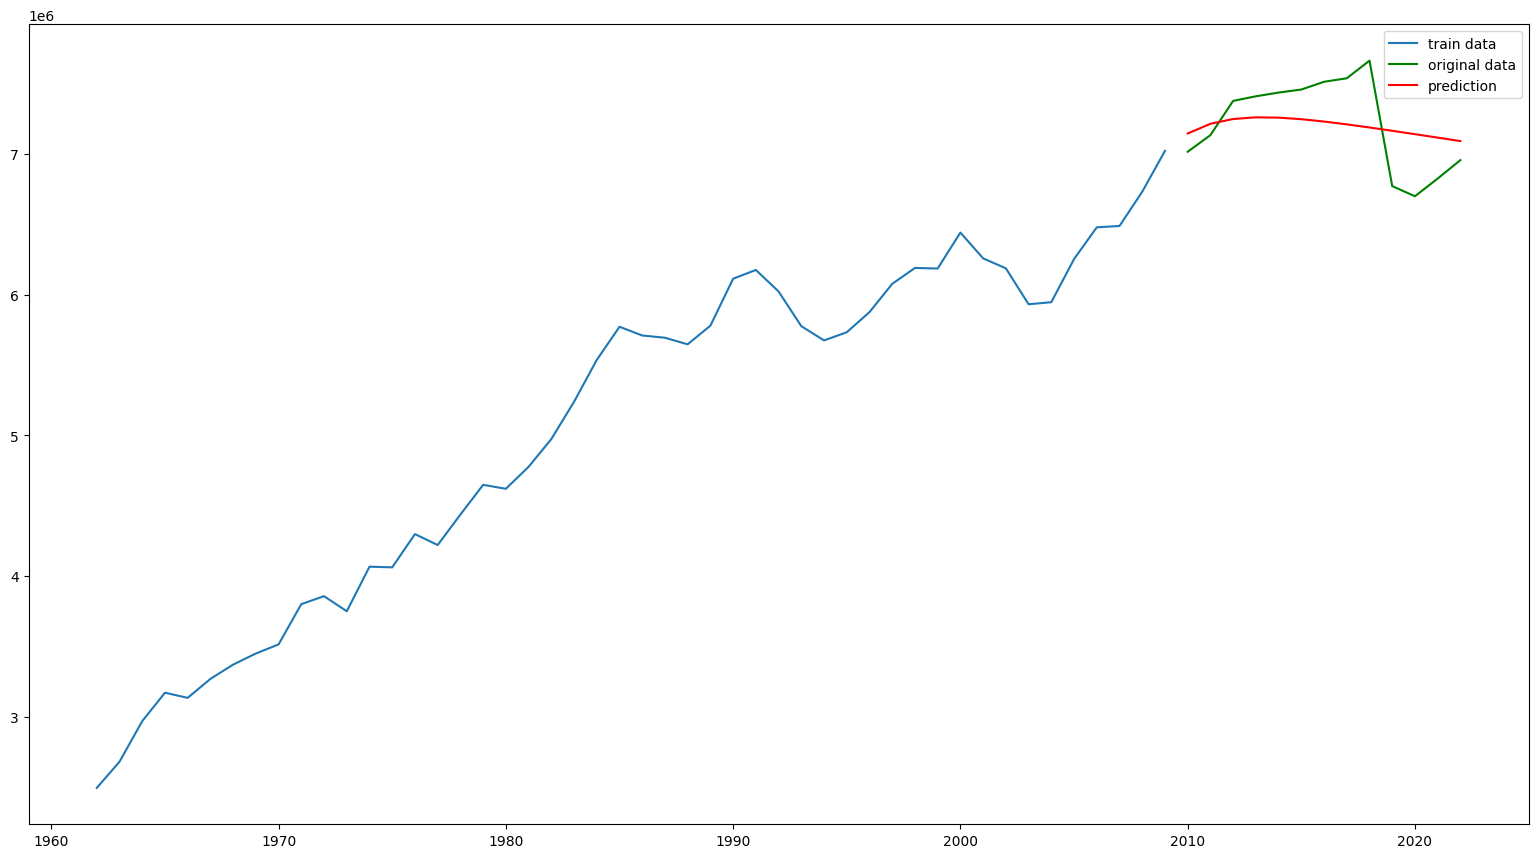

In [32]:

# Make predictions on testing set
# parameters (2,0,1)
predictions = bestfit.forecast(steps=len (test))
# Mean absolute error calculation
mae = mean_absolute_error(test, predictions)
print('mae: %.2f' % mae)
# Plot predictions and actual values
fig=plt.figure(figsize=(15,8))
ax = fig.add_axes([1, 1, 1, 1])
ax=plt.plot(train, label='train data')
ax=plt.plot(test, color='green', label='original data')
ax=plt.plot(predictions, color='red', label='prediction')
plt.legend()
plt.show()

In [33]:
# Fitting the model
best_model = SARIMAX(df['Value']).fit(dis=-1)
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 7324
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -122781.828
Date:                Sun, 01 Dec 2024   AIC                         245567.655
Time:                        20:16:14   BIC                         245581.453
Sample:                             0   HQIC                        245572.399
                               - 7324                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9827      0.000   3426.422      0.000       0.982       0.983
sigma2      2.131e+13   6.12e-18   3.48e+30      0.000    2.13e+13    2.13e+13
Ljung-Box (L1) (Q):                   0.83   Jarque-

In [34]:
best_model.plot_diagnostics (figsize=(15,12));

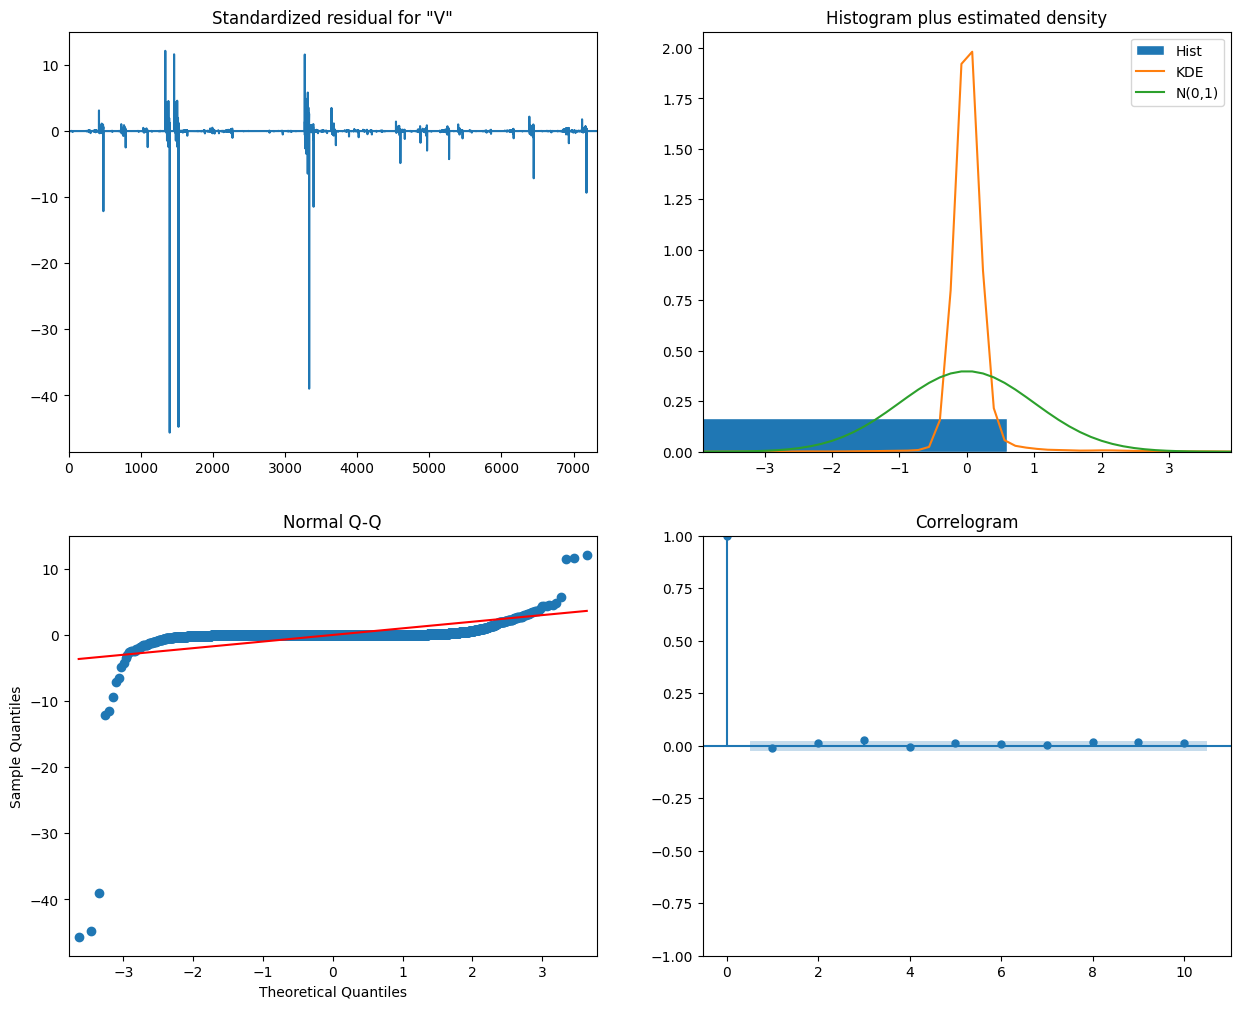

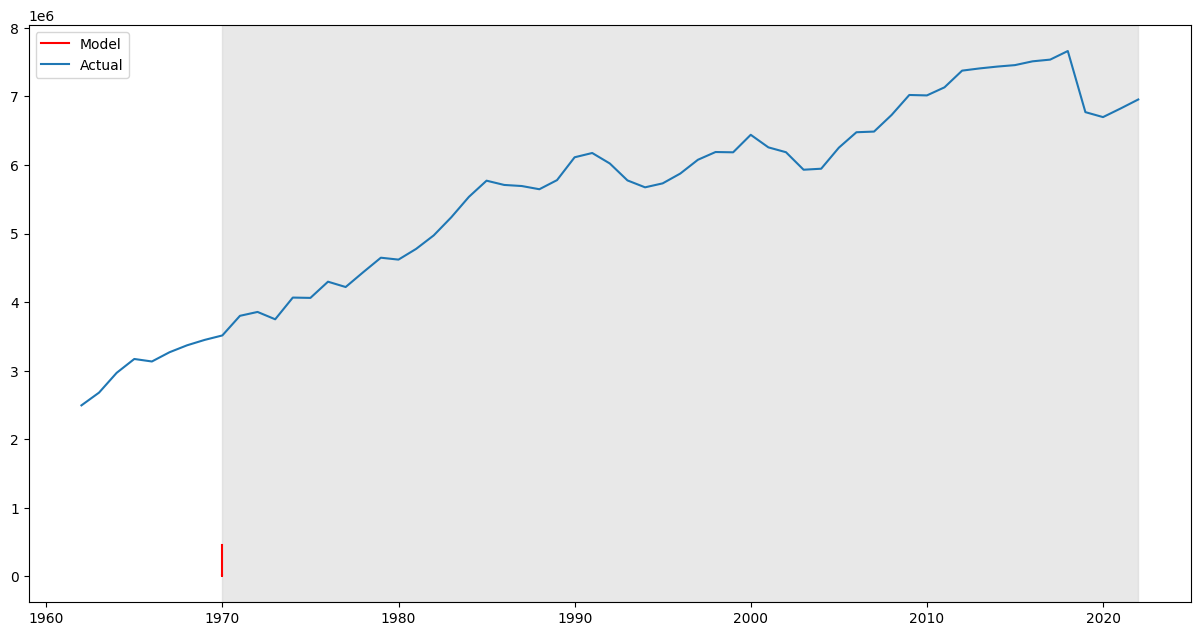

In [35]:
# Plot
new['arima_model'] = best_model.fittedvalues
new['arima_model'][:4+1] = np.nan  # Set first few values to NaN

# Generate forecast
forecast = best_model.predict(start=new.shape[0], end=new.shape[0] + 8)

# Combine the existing ARIMA model values with the forecast
forecast = pd.concat([new['arima_model'], forecast])

# Plot the results
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='Model')  # Plot the model predictions
plt.axvspan(new.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')  # Highlight the forecasted range
plt.plot(new['y'], label='Actual')  # Plot the actual values
plt.legend()
plt.show()


In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools

# Function to evaluate ARIMA model
def evaluate_arima_model(train, test, order):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Function to optimize ARIMA
def optimize_arima(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            order = (p, d, q)
            rmse = evaluate_arima_model(train, test, order)
            if rmse < best_score:
                best_score, best_cfg = rmse, order
            print(f'ARIMA{order} RMSE={rmse:.4f}')
        except:
            continue
    print(f'Best ARIMA{best_cfg} RMSE={best_score:.4f}')
    return best_cfg

# Function to evaluate SARIMA model
def evaluate_sarima_model(train, test, order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.forecast(steps=len(test))
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Function to optimize SARIMA
def optimize_sarima(train, test, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    best_score, best_cfg = float("inf"), None
    for p, d, q, P, D, Q in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values):
        try:
            order = (p, d, q)
            seasonal_order = (P, D, Q, m)
            rmse = evaluate_sarima_model(train, test, order, seasonal_order)
            if rmse < best_score:
                best_score, best_cfg = rmse, (order, seasonal_order)
            print(f'SARIMA{order}x{seasonal_order} RMSE={rmse:.4f}')
        except:
            continue
    print(f'Best SARIMA{best_cfg} RMSE={best_score:.4f}')
    return best_cfg

# Load a time series dataset (replace with your dataset)
# Example: A random walk time series
np.random.seed(42)
data = pd.Series(np.random.randn(100).cumsum())

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Hyperparameter ranges for ARIMA
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Optimize ARIMA
print("Optimizing ARIMA...")
best_arima_order = optimize_arima(train, test, p_values, d_values, q_values)

# Hyperparameter ranges for SARIMA
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
m = 12  # Example: Monthly seasonality

# Optimize SARIMA
print("\nOptimizing SARIMA...")
best_sarima_order, best_seasonal_order = optimize_sarima(train, test, p_values, d_values, q_values, P_values, D_values, Q_values, m)

# Evaluate final ARIMA model
print("\nFinal ARIMA model evaluation:")
arima_model = ARIMA(train, order=best_arima_order)
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test))
arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
print(f"ARIMA RMSE: {arima_rmse:.4f}")

# Evaluate final SARIMA model
print("\nFinal SARIMA model evaluation:")
sarima_model = SARIMAX(train, order=best_sarima_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)
sarima_predictions = sarima_fit.forecast(steps=len(test))
sarima_rmse = sqrt(mean_squared_error(test, sarima_predictions))
print(f"SARIMA RMSE: {sarima_rmse:.4f}")



Optimizing ARIMA...
ARIMA(0, 0, 0) RMSE=3.8356
ARIMA(0, 0, 1) RMSE=3.8145
ARIMA(0, 0, 2) RMSE=3.5659
ARIMA(0, 1, 0) RMSE=0.9247
ARIMA(0, 1, 1) RMSE=0.9107
ARIMA(0, 1, 2) RMSE=0.9210
ARIMA(1, 0, 0) RMSE=1.0396
ARIMA(1, 0, 1) RMSE=1.0379
ARIMA(1, 0, 2) RMSE=1.0441
ARIMA(1, 1, 0) RMSE=0.9106
ARIMA(1, 1, 1) RMSE=0.9971
ARIMA(1, 1, 2) RMSE=1.0116
ARIMA(2, 0, 0) RMSE=1.0378
ARIMA(2, 0, 1) RMSE=1.0975
ARIMA(2, 0, 2) RMSE=1.0923
ARIMA(2, 1, 0) RMSE=0.9192
ARIMA(2, 1, 1) RMSE=1.0056
ARIMA(2, 1, 2) RMSE=0.9091
Best ARIMA(2, 1, 2) RMSE=0.9091

Optimizing SARIMA...
SARIMA(0, 0, 0)x(0, 0, 0, 12) RMSE=9.4419
SARIMA(0, 0, 0)x(0, 0, 1, 12) RMSE=7.4568
SARIMA(0, 0, 0)x(0, 0, 2, 12) RMSE=7.5752
SARIMA(0, 0, 0)x(0, 1, 0, 12) RMSE=2.0065
SARIMA(0, 0, 0)x(0, 1, 1, 12) RMSE=2.6712
SARIMA(0, 0, 0)x(0, 1, 2, 12) RMSE=4.2557
SARIMA(0, 0, 0)x(1, 0, 0, 12) RMSE=3.1382
SARIMA(0, 0, 0)x(1, 0, 1, 12) RMSE=3.9463
SARIMA(0, 0, 0)x(1, 0, 2, 12) RMSE=4.9988
SARIMA(0, 0, 0)x(1, 1, 0, 12) RMSE=3.4476
SARIMA(0, 0, 0)x(1, 

In [37]:
import pickle as pkl
pkl.dump(best_model, open('sarima.pkl', 'wb'))

In [38]:
import pickle as pkl
pkl.dump(best_model, open('arima.pkl', 'wb'))

In [39]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('rice production across different countries from 1961 to 2021.csv')

# Replace 'your_date_column' and 'your_value_column' with the actual column names from your dataframe (df)
new = df.rename(columns={'Year': 'ds', 'Value': 'y'})  # Example: Assuming 'Year' is your date column and 'Value' is your value column

# Instantiate and fit the Prophet model
model = Prophet(seasonality_mode='multiplicative')
model.fit(new)

Importing plotly failed. Interactive plots will not work.
20:18:34 - cmdstanpy - INFO - Chain [1] start processing
20:18:35 - cmdstanpy - INFO - Chain [1] done processing


In [40]:

future = model.make_future_dataframe (periods=1)
future.tail()



,ds
57,1970-01-01 00:00:00.000002018
58,1970-01-01 00:00:00.000002019
59,1970-01-01 00:00:00.000002020
60,1970-01-01 00:00:00.000002021
61,1970-01-02 00:00:00.000002021


In [41]:
forecast =model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
57,1970-01-01 00:00:00.000002018,3.796094e+06,-2.874011e+07,3.644013e+07
58,1970-01-01 00:00:00.000002019,3.796094e+06,-2.631458e+07,3.752306e+07
59,1970-01-01 00:00:00.000002020,3.796094e+06,-2.741142e+07,3.491206e+07
60,1970-01-01 00:00:00.000002021,3.796094e+06,-2.652724e+07,3.304271e+07
61,1970-01-02 00:00:00.000002021,3.797711e+06,-2.970530e+07,3.401930e+07


In [42]:

figl = model.plot(forecast,xlabel='Year', ylabel='Production',include_legend=True, figsize=(21,8))

In [43]:
fig2 = model.plot_components(forecast)

In [44]:
from sklearn.metrics import mean_absolute_error
# Generate predictions on test data
# Ensure y_pred contains predictions corresponding to the test data in 'new'
y_pred = model.predict(new[['ds']])['yhat'] # Predict on the 'ds' values from 'new'

# Calculate root mean squared error
mae = mean_absolute_error(new['y'].values, y_pred)
print('MAE:', mae)

MAE: 9080432.907781167


In [45]:
import numpy as np

# Example actual and predicted values
y_actual = np.array([10, 15, 20, 25, 30])
y_pred = np.array([12, 14, 19, 27, 28])

# Calculate R^2 Score
r2 = r2_score(y_actual, y_pred)
print(f"R^2 Score: {r2}")


R^2 Score: 0.944


In [46]:

#import pickle
import pickle
pickle.dump(model, open('fbprophet.pkl', 'wb'))

In [47]:

import pickle as pkl
pkl.dump(best_model, open('sarima.pkl', 'wb'))